<a href="https://colab.research.google.com/github/DivinSphere/Aprimoramento-de-um-Modelo-de-IA-para-Operacoes-Matematicas-Basicas-/blob/main/Aprimoramento_de_um_Modelo_de_IA_para_Operacoes_Matematicas_Basicas_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ismael Weslley Neves de Brito - 2018101710

In [1]:
# Instalação e importação das bibliotecas necessárias para o projeto
!pip install numpy scikit-learn tensorflow matplotlib plotly -q

import os
import random
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(42)  # Configura a semente do numpy
tf.random.set_seed(42)  # Configura a semente do tensorflow

In [2]:
# Gerar todas as combinações possíveis de num1 e num2 no intervalo, incluindo valores negativos
# Função utilizada para gerar os dados de treino do modelo
def gerar_dados(num1_range, num2_range, step=1):
    X = []
    y = []

    total_combinacoes = 0

    for num1 in range(num1_range[0], num1_range[1] + 1, step):
        for num2 in range(num2_range[0], num2_range[1] + 1, step):
            if num2 == 0:
                continue  # Evita divisão por zero

            total_combinacoes += 1  # Contar a combinação válida

            for op in range(4):
                X.append([num1, num2, op])

                # Definir o resultado de acordo com a operação
                if op == 0:
                    y.append(num1 + num2)  # Soma
                elif op == 1:
                    y.append(num1 - num2)  # Subtração
                elif op == 2:
                    y.append(num1 * num2)  # Multiplicação
                elif op == 3:
                    y.append(num1 / num2)  # Divisão

    # Converter listas para arrays NumPy
    X = np.array(X)
    y = np.array(y)

    # Mostrar quantidade de dados gerados
    total_dados = total_combinacoes * 4
    print(f"Total de dados gerados: {total_dados}")

    return X, y

# Gerar os dados e dividir em treinamento e teste
X, y = gerar_dados(num1_range=(-15, 15), num2_range=(-15, 15), step=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Total de dados gerados: 3720


In [3]:
# Modelo com mais complexidade
model = Sequential([

    Input(shape=(3,)),                # Definindo a entrada do modelo

    Dense(128, activation='relu'),  # Camada 1

    Dense(128, activation='relu'),  # Camada 2

    Dense(128, activation='relu'),  # Camada 3

    Dense(1)  # Camada de saída (regressão)
])

# Compilação e visualização do modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # Usando erro quadrático médio e MAE
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,665 (131.50 KB)

 Trainable params: 33,665 (131.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Variáveis para armazenar as perdas e a melhor época
train_losses = []
val_losses = []
best_epoch = 0
best_model = None
best_val_loss = float('inf')
epoch_errors = [] # Lista para armazenar o erro quadrático de cada época
epochs_max = 300 # Número máximo de épocas


Iniciando Epoch 1/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1280.0895 - mae: 20.9015 - val_loss: 1233.2897 - val_mae: 23.2874
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Epoch 1:
  Perda de Treinamento: 1342.6313
  Perda de Validação: 1233.2897
  Erro Quadrático Médio (MSE): 1275.6720
  ** Melhores Pesos Salvos! **

Iniciando Epoch 2/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1199.9285 - mae: 22.2944 - val_loss: 1187.4380 - val_mae: 23.0951
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 2:
  Perda de Treinamento: 1280.8589
  Perda de Validação: 1187.4380
  Erro Quadrático Médio (MSE): 1211.5817
  ** Melhores Pesos Salvos! **

Iniciando Epoch 3/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1144.7400 - mae: 21.5921 - val_loss: 1078.6050 - val_mae: 21.9881
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 3:
  Perda de Treinamento: 1190.7104
  Perda de Validação: 1078.6050
  Erro Quadrático Médio (MSE): 1049.9224
  ** Melhores Pesos Salvos! **

Iniciando Epoch 4

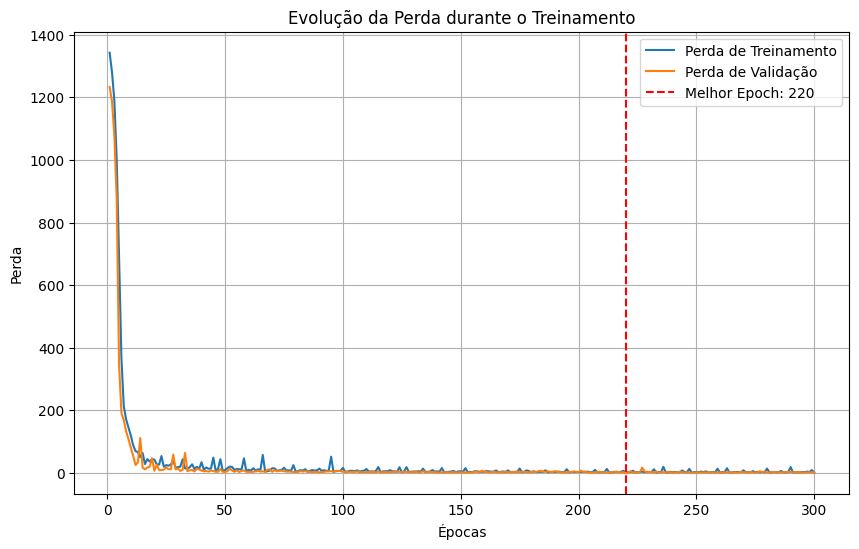

In [5]:
for epoch in range(epochs_max):
    print(f"\nIniciando Epoch {epoch + 1}/{epochs_max}")

    # Treinamento por uma época
    history = model.fit(X_train, y_train,
                            epochs=1,
                            batch_size=2,
                            verbose=1,
                            validation_split=0.2)

    # Coleta as perdas
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Calcula previsões e MSE
    y_val_pred = model.predict(X_train[int(0.9 * len(X_train)):])
    mse = mean_squared_error(y_train[int(0.9 * len(X_train)):], y_val_pred)

    epoch_errors.append(mse)

    print(f"Epoch {epoch + 1}:")
    print(f"  Perda de Treinamento: {train_loss:.4f}")
    print(f"  Perda de Validação: {val_loss:.4f}")
    print(f"  Erro Quadrático Médio (MSE): {mse:.4f}")

    # Salvar os melhores pesos
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model.get_weights()
        best_epoch = epoch + 1
        print("  ** Melhores Pesos Salvos! **")

# Plotar o gráfico de perdas
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs_max + 1), train_losses, label='Perda de Treinamento')
plt.plot(range(1, epochs_max + 1), val_losses, label='Perda de Validação')
plt.axvline(best_epoch, color='r', linestyle='--', label=f'Melhor Epoch: {best_epoch}')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Evolução da Perda durante o Treinamento')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Restaura os melhores pesos no modelo
model.set_weights(best_model)
print(f"Melhor perda na validação: {best_val_loss}")
# Avalie o modelo
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Erro médio quadrático no teste: ",loss[0])

Melhor perda na validação: 0.5540341734886169
Erro médio quadrático no teste:  1.1003844738006592


In [7]:
# Modelo pré treinado removido, para deixar os 2 modelos sendo treinados de forma igual

# URL e caminho do modelo já treinado
# url = 'https://drive.usercontent.google.com/u/0/uc?id=1N1A_4jMUyYvC5igAUQyHf6rgs8J98Jbc&export=download'
# model_path = 'modelo_calculador.keras'

# Baixar o arquivo do modelo
# print("Baixando o modelo...")
# response = requests.get(url)
# with open(model_path, 'wb') as file:
#    file.write(response.content)

# Carregar o modelo salvo
# model = load_model(model_path)
# Compilar o modelo após o carregamento
# model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['mae'])

# print("Modelo baixado e carregado com sucesso.")

# Salvar o modelo inteiro
#model.save('modelo_calculador.keras')
#print("Modelo salvo com sucesso.")

In [8]:
def plot_operation_graph(X_test, model, operacao, operacoes):

    # Filtrar os dados de teste para a operação atual
    X_test_op = X_test[X_test[:, 2] == operacao]
    num1 = X_test_op[:, 0]
    num2 = X_test_op[:, 1]

    # Calcular os valores reais para a operação atual
    if operacao == 0:
        z_real = num1 + num2
    elif operacao == 1:
        z_real = num1 - num2
    elif operacao == 2:
        z_real = num1 * num2
    elif operacao == 3:
        z_real = num1 / num2

    # Prever os resultados usando o modelo
    z_pred = model.predict(X_test_op).flatten()



    # Criar o gráfico 3D
    fig = go.Figure(data=[
        go.Scatter3d(x=num1, y=num2, z=z_real,
                     mode='markers',
                     marker=dict(size=5, color='blue', symbol='circle-open'),
                     name='Real'),
        go.Scatter3d(x=num1, y=num2, z=z_pred,
                     mode='markers',
                     marker=dict(size=5, color='red', symbol='circle'),
                     name='Predito')
    ])

    # Atualizar o layout
    fig.update_layout(scene=dict(xaxis_title='Número 1',
                                 yaxis_title='Número 2',
                                 zaxis_title='Resultado (Z)'),
                      title=f"Operação: {operacoes[operacao]} - Resultados Reais vs. Preditos")

    # Exibir o gráfico
    fig.show()

operacoes = {0: "Adição", 1: "Subtração", 2: "Multiplicação", 3: "Divisão"}

In [9]:
# Gerar o gráfico para adição
plot_operation_graph(X_test, model, operacao=0, operacoes=operacoes)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [10]:
# Gerar o gráfico para subtração
plot_operation_graph(X_test, model, operacao=1, operacoes=operacoes)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [11]:
# Gerar o gráfico para multiplicação
plot_operation_graph(X_test, model, operacao=2, operacoes=operacoes)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [12]:
# Gerar o gráfico para divisão
plot_operation_graph(X_test, model, operacao=3, operacoes=operacoes)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [13]:
def plot_error_by_input_range(X_test, model, operacao, operacoes):
    """
    Gráfico de dispersão mostrando como os erros variam com os valores de entrada.
    """
    # Filtrar os dados de teste para a operação atual
    X_test_op = X_test[X_test[:, 2] == operacao]
    num1 = X_test_op[:, 0]
    num2 = X_test_op[:, 1]

    # Calcular os valores reais
    if operacao == 0:
        z_real = num1 + num2
        op_name = "Soma"
    elif operacao == 1:
        z_real = num1 - num2
        op_name = "Diferença"
    elif operacao == 2:
        z_real = num1 * num2
        op_name = "Produto"
    elif operacao == 3:
        z_real = num1 / num2
        op_name = "Quociente"

    # Prever os resultados
    z_pred = model.predict(X_test_op).flatten()

    # Calcular erros
    errors = np.abs(z_pred - z_real)

    # Criar um mapa de cores personalizado
    colors = ['purple', 'green', 'red']  # roxo para negativos, verde para zero, vermelho para positivos
    custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

    # Criar figura com 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # Gráfico 1: Erro vs. Número 1
    scatter1 = ax1.scatter(num1, errors, c=num2, cmap=custom_cmap, alpha=0.7, s=70)
    ax1.set_xlabel('Número 1', fontsize=12)
    ax1.set_ylabel('Erro Absoluto', fontsize=12)
    ax1.set_title(f'Erro vs. Número 1 para {op_name}', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Adicionar colorbar para o primeiro gráfico
    cbar1 = plt.colorbar(scatter1, ax=ax1)
    cbar1.set_label('Número 2', fontsize=10)

    # Gráfico 2: Erro vs. Número 2
    scatter2 = ax2.scatter(num2, errors, c=num1, cmap=custom_cmap, alpha=0.7, s=70)
    ax2.set_xlabel('Número 2', fontsize=12)
    ax2.set_ylabel('Erro Absoluto', fontsize=12)
    ax2.set_title(f'Erro vs. Número 2 para {op_name}', fontsize=14)
    ax2.grid(True, alpha=0.3)

    # Adicionar colorbar para o segundo gráfico
    cbar2 = plt.colorbar(scatter2, ax=ax2)
    cbar2.set_label('Número 1', fontsize=10)

    # Adicionar título geral
    plt.suptitle(f'Análise de Erros por Valores de Entrada para {operacoes[operacao]}', fontsize=16)

    plt.tight_layout()

    return fig

# Definição das operações
operacoes = {0: "Adição", 1: "Subtração", 2: "Multiplicação", 3: "Divisão"}

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


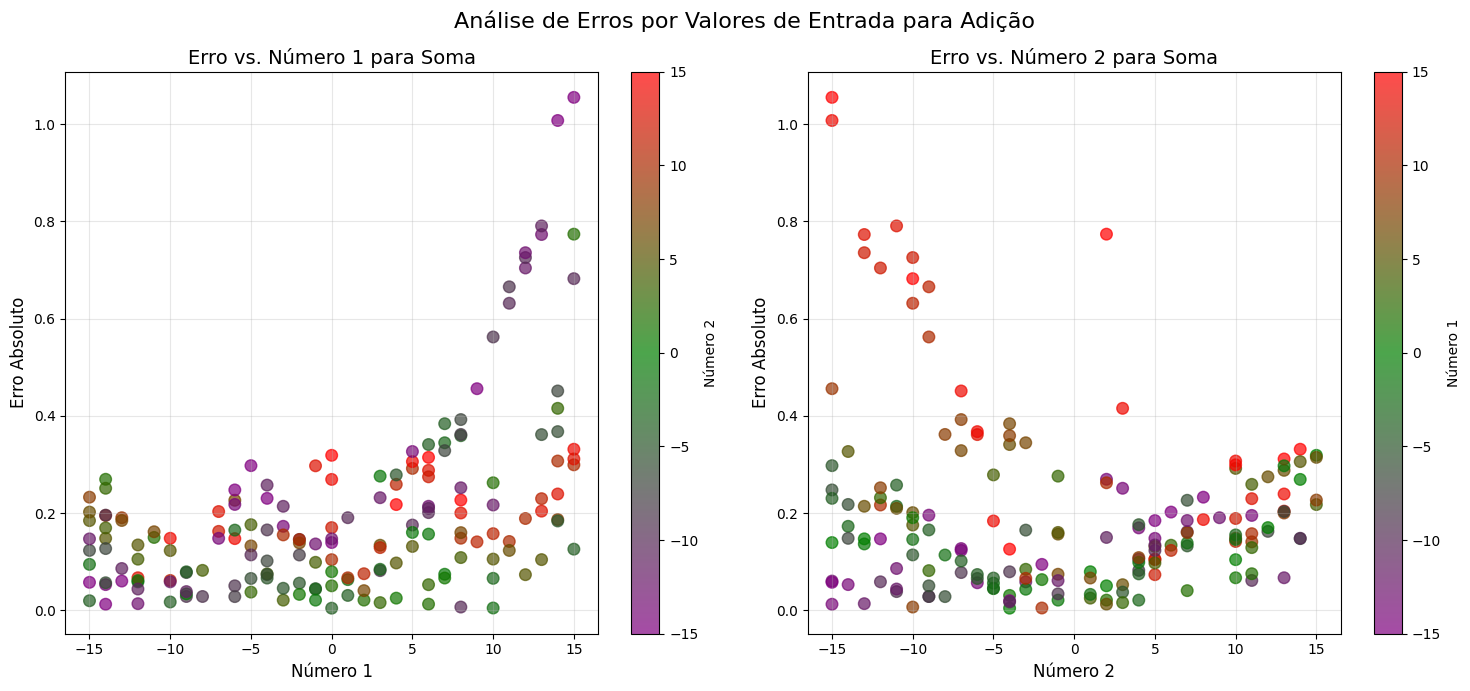

In [14]:
# Gerar o gráfico da soma 2D
fig2 = plot_error_by_input_range(X_test, model, operacao=0, operacoes=operacoes)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


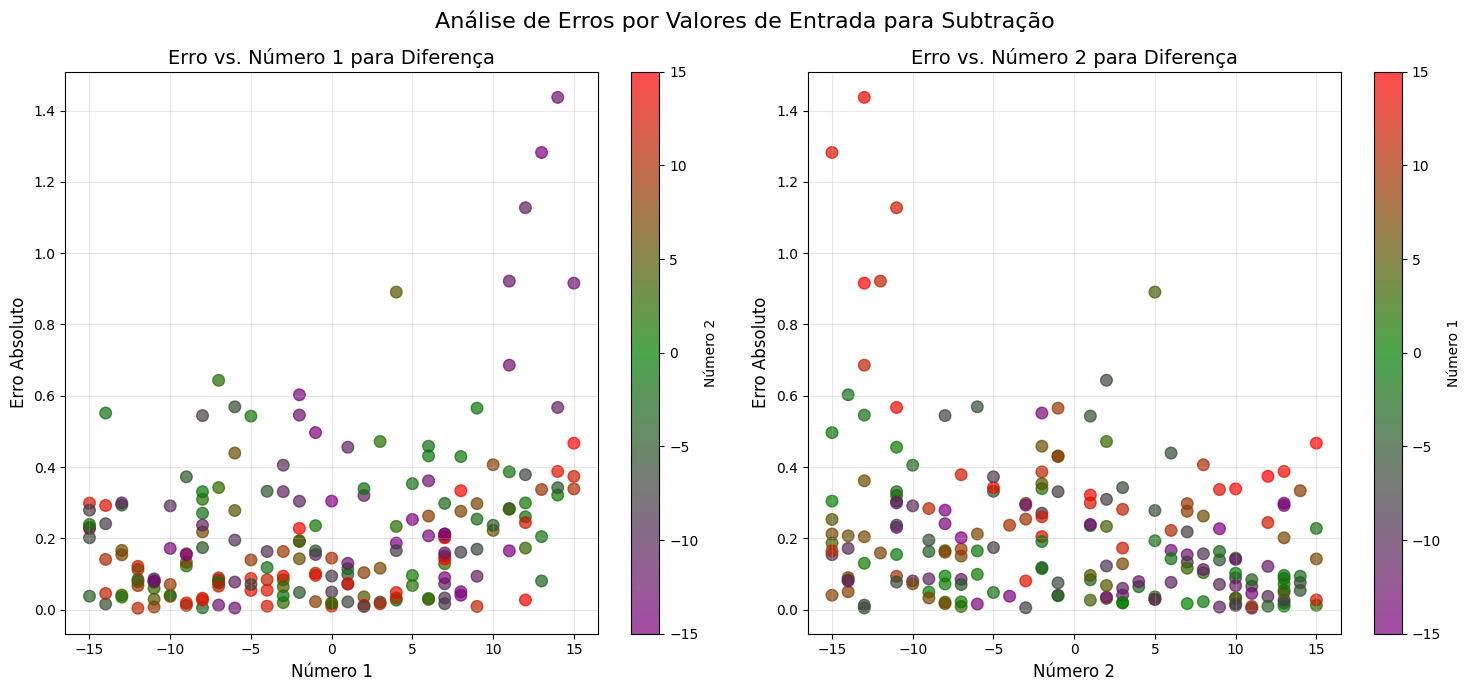

In [15]:
# Gerar o gráfico da subtração 2D
fig2 = plot_error_by_input_range(X_test, model, operacao=1, operacoes=operacoes)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


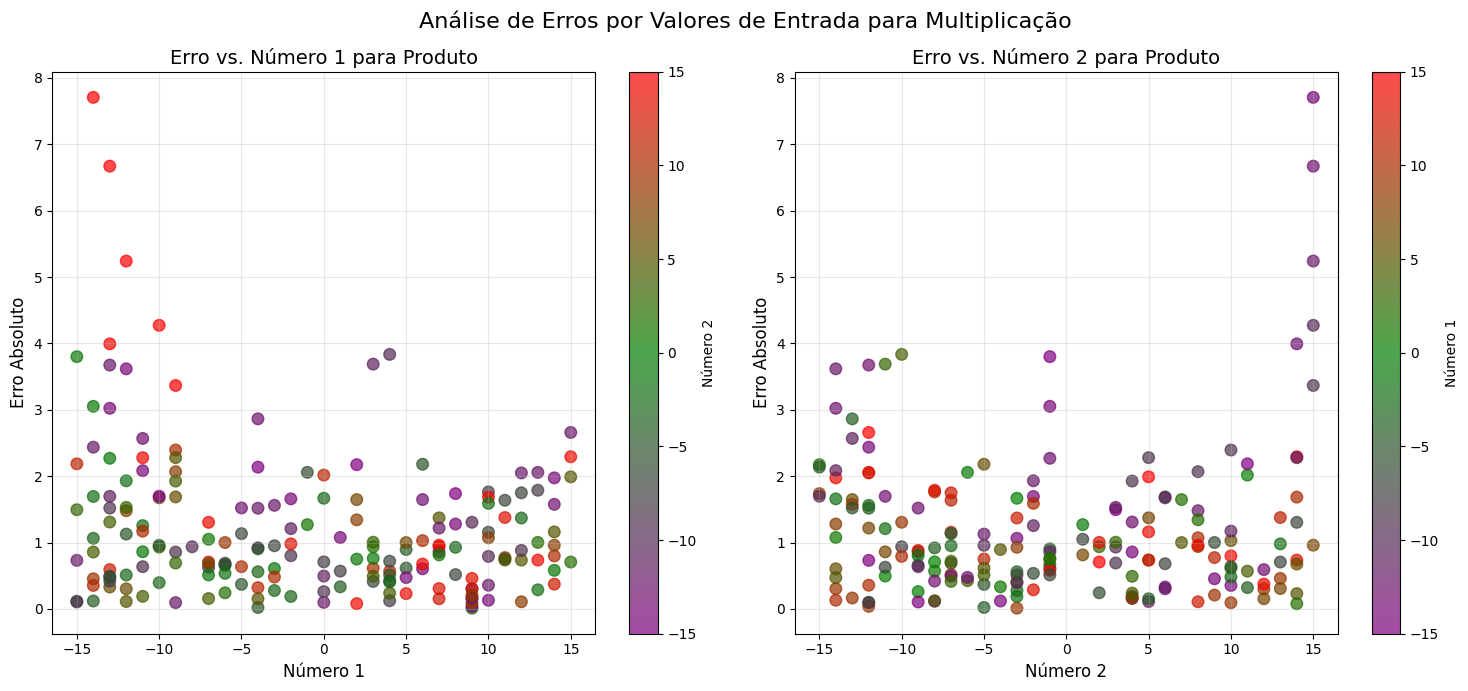

In [16]:
# Gerar o gráfico da multiplicação 2D
fig2 = plot_error_by_input_range(X_test, model, operacao=2, operacoes=operacoes)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


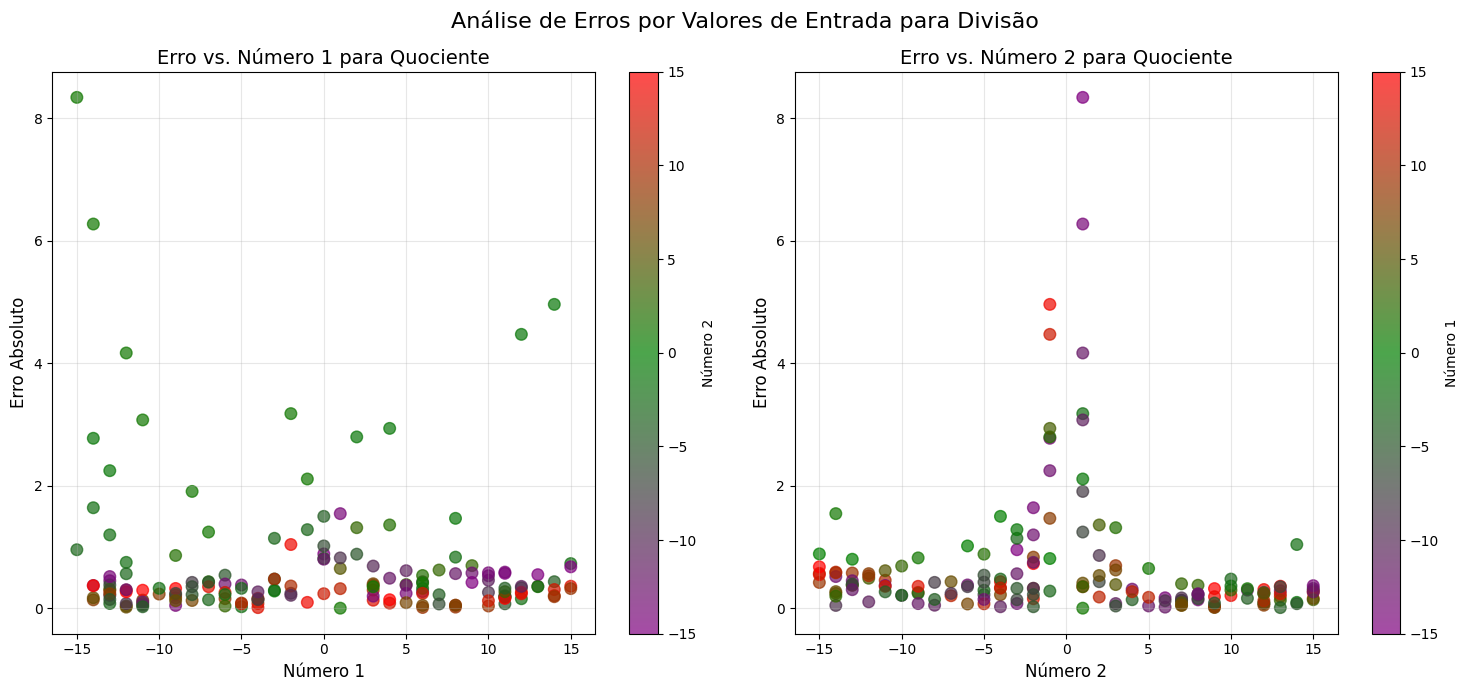

In [17]:
# Gerar o gráfico da divisão 2D
fig2 = plot_error_by_input_range(X_test, model, operacao=3, operacoes=operacoes)
plt.show()

In [18]:
def sistema_especialista(num1, num2, operacao, resultado_real, resultado_predito, precisao=7):

    operacoes_simbolos = {0: "+", 1: "-", 2: "*", 3: "/"}
    simbolo_operacao = operacoes_simbolos.get(operacao, "?")

    # Evitar divisão por zero no cálculo percentual
    if abs(resultado_real) < 1e-10:  # Valor muito próximo de zero
        if abs(resultado_predito) < 1e-10:  # Ambos próximos de zero
            diferenca_percentual = 0
        else:
            diferenca_percentual = 100  # Erro de 100% se real é zero mas predito não é
    else:
        diferenca_percentual = abs((resultado_predito - resultado_real) / resultado_real) * 100

    diferenca = resultado_predito - resultado_real

    # Formatação dos resultados com número adequado de casas decimais
    resultado_correto_formatado = f"{resultado_real:.4f}".rstrip('0').rstrip('.') if '.' in f"{resultado_real:.4f}" else f"{resultado_real:.4f}"
    resultado_predito_formatado = f"{resultado_predito:.4f}".rstrip('0').rstrip('.') if '.' in f"{resultado_predito:.4f}" else f"{resultado_predito:.4f}"

    # Feedback baseado na precisão
    if abs(diferenca) <= 1e-6:
        return f"{num1:.2f} {simbolo_operacao} {num2:.2f} = {resultado_predito_formatado} ✓ (Exato: {resultado_correto_formatado}). Parabéns, resposta perfeita!"
    elif diferenca_percentual <= precisao:
        return f"{num1:.2f} {simbolo_operacao} {num2:.2f} = {resultado_predito_formatado} ≈ (Exato: {resultado_correto_formatado}). Resposta aceitável! Erro: {diferenca_percentual:.2f}% (máx: {precisao}%)."
    else:
        # Feedback mais detalhado para erros maiores
        if diferenca > 0:
            dica = "Valor previsto maior que o real."
        else:
            dica = "Valor previsto menor que o real."
        return f"{num1:.2f} {simbolo_operacao} {num2:.2f} = {resultado_predito_formatado} ✗ (Exato: {resultado_correto_formatado}). Erro de {diferenca_percentual:.2f}%! {dica}"


def resolver_problema(num1, num2, operacao):
    try:
        # Prever o resultado usando a rede neural
        entrada = np.array([[num1, num2, operacao]])
        resultado_predito = model.predict(entrada, verbose=0)[0][0]

        # Calcular o resultado real
        if operacao == 0:
            resultado_real = num1 + num2
        elif operacao == 1:
            resultado_real = num1 - num2
        elif operacao == 2:
            resultado_real = num1 * num2
        elif operacao == 3:
            if abs(num2) < 1e-10:  # Evitar divisão por zero
                return f"Erro: Divisão por zero ou valor muito próximo de zero ({num2:.10f})."
            resultado_real = num1 / num2
        else:
            return f"Operação inválida: {operacao}. Use 0 para adição, 1 para subtração, 2 para multiplicação e 3 para divisão."

        # Retornar feedback do sistema especialista
        return sistema_especialista(num1, num2, operacao, resultado_real, resultado_predito)

    except Exception as e:
        return f"Erro ao processar a operação: {str(e)}"

In [19]:
for _ in range(10):
    a = random.randint(-20, 20)
    b = random.randint(-20, 20)
    op = random.randint(0, 3)

    if op in (2, 3):
        while a == 0 or b == 0:
            a = random.randint(-20, 20)
            b = random.randint(-20, 20)

    print(resolver_problema(a, b, op), "\n")

-20.00 - -11.00 = -8.211 ✗ (Exato: -9). Erro de 8.77%! Valor previsto maior que o real. 

-6.00 + -20.00 = -25.5 ≈ (Exato: -26). Resposta aceitável! Erro: 1.92% (máx: 7%). 

0.00 + 10.00 = 9.8955 ≈ (Exato: 10). Resposta aceitável! Erro: 1.04% (máx: 7%). 

-7.00 * -20.00 = 130.0048 ✗ (Exato: 140). Erro de 7.14%! Valor previsto menor que o real. 

6.00 / -4.00 = -1.8403 ✗ (Exato: -1.5). Erro de 22.69%! Valor previsto menor que o real. 

-14.00 * -5.00 = 69.8251 ≈ (Exato: 70). Resposta aceitável! Erro: 0.25% (máx: 7%). 

-14.00 + 18.00 = 3.7892 ≈ (Exato: 4). Resposta aceitável! Erro: 5.27% (máx: 7%). 

-2.00 + -16.00 = -17.8623 ≈ (Exato: -18). Resposta aceitável! Erro: 0.77% (máx: 7%). 

3.00 * 7.00 = 20.5519 ≈ (Exato: 21). Resposta aceitável! Erro: 2.13% (máx: 7%). 

4.00 / -19.00 = -2.3853 ✗ (Exato: -0.2105). Erro de 1033.03%! Valor previsto menor que o real. 



## MODELO ORIGINAL

https://colab.research.google.com/drive/1deU5iY_4CVQY1k86xpo4JOORe7TDrFsp?usp=sharing

In [20]:
# Exemplo de dados: [número1, número2, operação (0: adição, 1: subtração, 2: multiplicação, 3: divisão)]
# X = np.array([[2, 3, 0],[3, 2, 0],[5, 1, 0],[5, 1, 1],[4, 2, 2],[6, 3, 3],])

# Respostas esperadas
# y = np.array([5, 5, 6, 4, 8, 2])  # Resultados das operações acima

# Dividir os dados em treino e teste
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

model_ori = Sequential([
    Dense(10, input_shape=(3,), activation='relu'),  # Camada oculta com 10 neurônios
    Dense(1)  # Camada de saída (resultado da operação)
])

model_ori.compile(optimizer='adam', loss='mse')  # Usando erro quadrático médio como função de perda


# Variáveis para rastrear o melhor modelo e a menor perda de validação, para poder selecionar a melhor época e utilizar


# Variáveis para armazenar as perdas e a melhor época
train_losses = []
val_losses = []
best_epoch = 0
best_model = None
best_val_loss = float('inf')
epoch_errors = [] # Lista para armazenar o erro quadrático de cada época
epochs_max = 300 # Número máximo de épocas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Iniciando Epoch 1/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1529.2261 - val_loss: 1394.5415
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1:
  Perda de Treinamento: 1635.5629
  Perda de Validação: 1394.5415
  Erro Quadrático Médio (MSE): 1507.0990
  ** Melhores Pesos Salvos! **

Iniciando Epoch 2/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1356.9060 - val_loss: 1288.2742
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 2:
  Perda de Treinamento: 1463.7101
  Perda de Validação: 1288.2742
  Erro Quadrático Médio (MSE): 1378.6022
  ** Melhores Pesos Salvos! **

Iniciando Epoch 3/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1250.4999 - val_loss: 1237.0182
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 3:
  Perda de Treinamento: 1357.8091
  Perda de Validação: 1237.0182
  Erro Quadrático Médio (MSE): 1304.9066
  ** Melhores Pesos Salvos! **

Iniciando Epoch 4/300
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1199.5851 - val_loss: 1218.5812
10/10 ━━━━━━━━━

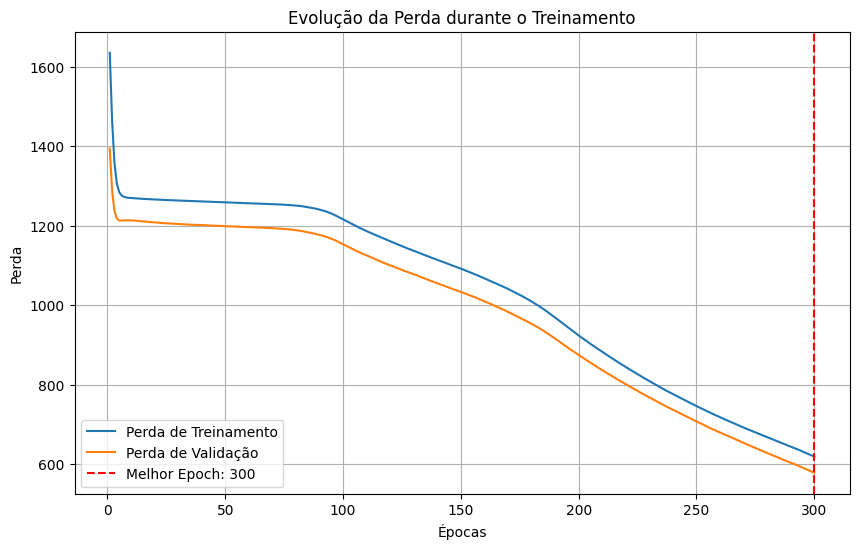

In [21]:
for epoch in range(epochs_max):
    print(f"\nIniciando Epoch {epoch + 1}/{epochs_max}")

    # Treinamento por uma época
    history = model_ori.fit(X_train, y_train,
                            epochs=1,
                            batch_size=2,
                            verbose=1,
                            validation_split=0.2)

    # Coleta as perdas
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Calcula previsões e MSE
    y_val_pred = model_ori.predict(X_train[int(0.9 * len(X_train)):])
    mse = mean_squared_error(y_train[int(0.9 * len(X_train)):], y_val_pred)

    epoch_errors.append(mse)

    print(f"Epoch {epoch + 1}:")
    print(f"  Perda de Treinamento: {train_loss:.4f}")
    print(f"  Perda de Validação: {val_loss:.4f}")
    print(f"  Erro Quadrático Médio (MSE): {mse:.4f}")

    # Salvar os melhores pesos
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model_ori.get_weights()
        best_epoch = epoch + 1
        print("  ** Melhores Pesos Salvos! **")

# Plotar o gráfico de perdas
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs_max + 1), train_losses, label='Perda de Treinamento')
plt.plot(range(1, epochs_max + 1), val_losses, label='Perda de Validação')
plt.axvline(best_epoch, color='r', linestyle='--', label=f'Melhor Epoch: {best_epoch}')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Evolução da Perda durante o Treinamento')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Restaura os melhores pesos no modelo
model_ori.set_weights(best_model)
print(f"Melhor perda na validação: {best_val_loss}")
# Avalie o modelo
loss = model_ori.evaluate(X_test, y_test, verbose=0)
print(f"Erro médio quadrático no teste: ",loss)

Melhor perda na validação: 578.9218139648438
Erro médio quadrático no teste:  687.6343383789062


# COMPARAÇÂO

In [80]:
# Número de exemplos a prever e comparar
num_exemplos = 300

# Gerar dados de teste aleatórios
num1_aleatorios = np.random.randint(-50, 51, num_exemplos)
num2_aleatorios = np.random.randint(-50, 51, num_exemplos)
op_aleatorios = np.random.randint(0, 4, num_exemplos)

# Criar X_amostra com os dados aleatórios
X_amostra = np.column_stack((num1_aleatorios, num2_aleatorios, op_aleatorios))

# Calcular os valores reais correspondentes
y_amostra = []
operacoes_str = []  # List to store the operation strings
for i in range(num_exemplos):
    num1 = num1_aleatorios[i]
    num2 = num2_aleatorios[i]
    op = op_aleatorios[i]
    if op == 0:
        y_amostra.append(num1 + num2)
        operacoes_str.append(f"{num1} + {num2}")
    elif op == 1:
        y_amostra.append(num1 - num2)
        operacoes_str.append(f"{num1} - {num2}")
    elif op == 2:
        y_amostra.append(num1 * num2)
        operacoes_str.append(f"{num1} * {num2}")
    elif op == 3:
        if num2 == 0:
            y_amostra.append(0)  # Evita divisão por zero, set result to 0
            operacoes_str.append(f"{num1} / {num2} (Divisão por zero evitada)") #note the division by zero
        else:
            y_amostra.append(num1 / num2)
            operacoes_str.append(f"{num1} / {num2}")
y_amostra = np.array(y_amostra)

# Gerar previsões com ambos os modelos
y_pred_original = model_ori.predict(X_amostra).flatten()
y_pred_novo = model.predict(X_amostra).flatten()

# Calcular os erros para cada modelo
erros_original = y_pred_original - y_amostra
erros_novo = y_pred_novo - y_amostra

# Calcular o erro percentual para cada modelo
def erro_percentual(real, pred):
    return np.where(real != 0, (pred - real) / real * 100, 0)  # Avoid division by zero

erro_percentual_original = erro_percentual(y_amostra, y_pred_original)
erro_percentual_novo = erro_percentual(y_amostra, y_pred_novo)

# Create a Pandas DataFrame for easier formatting and printing
data = {
    'Operação': operacoes_str,  # Add the operation strings to the DataFrame
    'Real': y_amostra,
    'Modelo Original': y_pred_original,
    'Erro Modelo Original': erros_original,
    'Erro Percentual Original (%)': erro_percentual_original,
    'Modelo Novo': y_pred_novo,
    'Erro Modelo Novo': erros_novo,
    'Erro Percentual Novo (%)': erro_percentual_novo
}
df = pd.DataFrame(data)

# Format the numbers to two decimal places
pd.options.display.float_format = '{:.2f}'.format


# Calcular e imprimir a média dos erros absolutos e o erro total nos exemplos selecionados
mae_original_amostra = np.mean(np.abs(erros_original))
mae_novo_amostra = np.mean(np.abs(erros_novo))

tae_original_amostra = np.sum(np.abs(erros_original))
tae_novo_amostra = np.sum(np.abs(erros_novo))

print(f"\nErro Absoluto Médio (MAE) nos exemplos (Original): {mae_original_amostra:.4f}")
print(f"Erro Absoluto Médio (MAE) nos exemplos (Novo): {mae_novo_amostra:.4f}")

print(f"\nErro Absoluto Total nos exemplos (Original): {tae_original_amostra:.4f}")
print(f"Erro Absoluto Total nos exemplos (Novo): {tae_novo_amostra:.4f}")

# Print the DataFrame
print("\nComparação Lado a Lado:")
df.head(60)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Erro Absoluto Médio (MAE) nos exemplos (Original): 215.2993
Erro Absoluto Médio (MAE) nos exemplos (Novo): 207.2273

Erro Absoluto Total nos exemplos (Original): 64589.7991
Erro Absoluto Total nos exemplos (Novo): 62168.1858

Comparação Lado a Lado:


<ipython-input-80-68c2dd61ebd4>:47: RuntimeWarning:

divide by zero encountered in divide



,Operação,Real,Modelo Original,Erro Modelo Original,Erro Percentual Original (%),Modelo Novo,Erro Modelo Novo,Erro Percentual Novo (%)
0,17 + 18,35.00,47.09,12.09,34.56,33.76,-1.24,-3.54
1,47 / 38,1.24,168.08,166.85,13489.83,519.90,518.67,41934.66
2,32 / -43,-0.74,-210.21,-209.46,28146.68,-596.59,-595.85,80066.83
3,-14 * -36,504.00,107.35,-396.65,-78.70,22.47,-481.53,-95.54
4,22 - 32,-10.00,104.85,114.85,-1148.47,23.49,33.49,-334.91
5,-27 - 8,-35.00,-109.58,-74.58,213.09,-31.90,3.10,-8.84
6,26 / -40,-0.65,-166.77,-166.12,25557.40,-502.95,-502.30,77277.44
7,-7 - -31,24.00,23.38,-0.62,-2.60,4.76,-19.24,-80.17
8,43 / 4,10.75,-71.85,-82.60,-768.34,74.88,64.13,596.55
9,32 + -15,17.00,-6.53,-23.53,-138.44,20.45,3.45,20.27


In [81]:
# Gráfico de comparação de previsões - todos os operadores juntos
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=list(range(num_exemplos)),
                            y=y_amostra,
                            mode='lines+markers',
                            name='Valores Reais',
                            marker=dict(color='black'),
                            hovertemplate='<b>Índice:</b> %{x}<br><b>Valor Real:</b> %{y:.2f}<extra></extra>'))  #


fig1.add_trace(go.Scatter(x=list(range(num_exemplos)),
                            y=y_pred_original,
                            mode='lines+markers',
                            name='Previsões (Original)',
                            marker=dict(color='red'),
                            hovertemplate='<b>Índice:</b> %{x}<br><b>Previsão Original:</b> %{y:.2f}<extra></extra>'))


fig1.add_trace(go.Scatter(x=list(range(num_exemplos)),
                            y=y_pred_novo,
                            mode='lines+markers',
                            name='Previsões (Novo)',
                            marker=dict(color='blue'),
                            hovertemplate='<b>Índice:</b> %{x}<br><b>Previsão Nova:</b> %{y:.2f}<extra></extra>'))


fig1.update_layout(title='Comparação das Previsões (Todos os Operadores)',
                    xaxis_title='Índice do Exemplo',
                    yaxis_title='Valor',
                    hovermode="closest")


fig1.show()


# Gráfico de comparação de erros
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=list(range(num_exemplos)),
                            y=erros_original,
                            mode='lines+markers',
                            name='Erros (Original)',
                            marker=dict(color='red'),
                            hovertemplate='<b>Índice:</b> %{x}<br><b>Erro Original:</b> %{y:.2f}<extra></extra>'))


fig2.add_trace(go.Scatter(x=list(range(num_exemplos)),
                            y=erros_novo,
                            mode='lines+markers',
                            name='Erros (Novo)',
                            marker=dict(color='blue'),
                            hovertemplate='<b>Índice:</b> %{x}<br><b>Erro Novo:</b> %{y:.2f}<extra></extra>'))


fig2.update_layout(title='Comparação dos Erros de Previsão',
                    xaxis_title='Índice do Exemplo',
                    yaxis_title='Erro (Previsão - Real)',
                    hovermode="closest")

fig2.add_hline(y=0, line=dict(color='black', dash='dash'))

fig2.show()



# Filtrar dados por operação
operacoes = [' + ', ' - ', ' * ', ' / ']
figuras = {}

for operacao in operacoes:
    indices = [i for i, op in enumerate(operacoes_str) if operacao in op]
    y_real_op = y_amostra[indices]
    y_pred_original_op = y_pred_original[indices]
    y_pred_novo_op = y_pred_novo[indices]

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(len(y_real_op))),
                                y=y_real_op,
                                mode='lines+markers',
                                name='Valores Reais',
                                marker=dict(color='black'),
                                hovertemplate='<b>Índice:</b> %{x}<br><b>Valor Real:</b> %{y:.2f}<extra></extra>'))

    fig.add_trace(go.Scatter(x=list(range(len(y_pred_original_op))),
                                y=y_pred_original_op,
                                mode='lines+markers',
                                name='Previsões (Original)',
                                marker=dict(color='red'),
                                hovertemplate='<b>Índice:</b> %{x}<br><b>Previsão Original:</b> %{y:.2f}<extra></extra>'))

    fig.add_trace(go.Scatter(x=list(range(len(y_pred_novo_op))),
                                y=y_pred_novo_op,
                                mode='lines+markers',
                                name='Previsões (Novo)',
                                marker=dict(color='blue'),
                                hovertemplate='<b>Índice:</b> %{x}<br><b>Previsão Nova:</b> %{y:.2f}<extra></extra>'))

    fig.update_layout(title=f'Comparação das Previsões ({operacao})',
                        xaxis_title='Índice do Exemplo',
                        yaxis_title='Valor',
                        hovermode="closest")

    figuras[operacao] = fig
    fig.show()